In [1]:
!pip install kaggle

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [3]:
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0
  0% 0.00/1.99M [00:00<?, ?B/s]
100% 1.99M/1.99M [00:00<00:00, 161MB/s]


In [4]:
# Extracting zip file from /content/twitter-entity-sentiment-analysis.zip
!unzip /content/twitter-entity-sentiment-analysis.zip

Archive:  /content/twitter-entity-sentiment-analysis.zip
  inflating: twitter_training.csv    
  inflating: twitter_validation.csv  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
validation = pd.read_csv("twitter_validation.csv",
                         header = None)
train = pd.read_csv("twitter_training.csv",
                    header = None)

In [7]:
train.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
validation.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [9]:
train.columns = ['id',
                 'information',
                 'type',
                 'text']

validation.columns = ['id',
                      'information',
                      'type',
                      'text']

In [10]:
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [11]:
validation.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [12]:
from copy import deepcopy

# Copying validation and train data
train1 = deepcopy(train)
validation1 = deepcopy(validation)

In [14]:
# Creating a new column in train1 by the name of lower column where text column rows will get transformed into lower cases
train1['lower'] = train1.text.str.lower()
train1['lower'] = [str(data) for data in train1.lower]
train1['lower'] = train1.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

# Now same with validation1
validation1['lower'] = validation1.text.str.lower()
validation1['lower'] = [str(data) for data in validation1.lower]
validation1['lower'] = validation1.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

In [15]:
train1.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [16]:
validation1.head()

,id,information,type,text,lower
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,i mentioned on facebook that i was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft why do i pay for word when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking is so full of closet hacking ...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,now the president is slapping americans in the...


Text(0.5, 1.0, 'Distribution of tweets per Branch and Type')

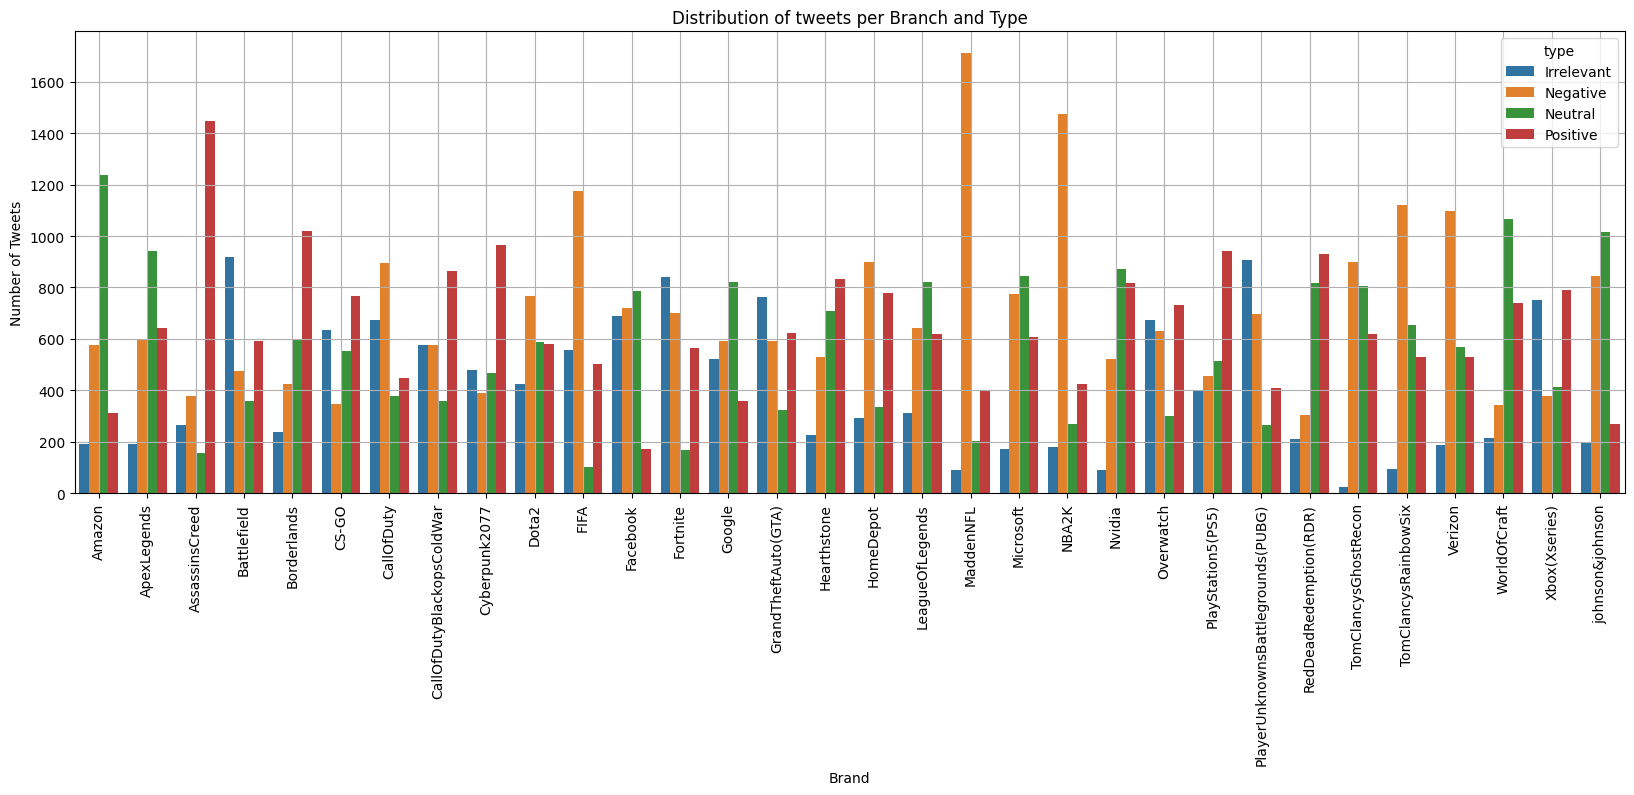

In [18]:
info_type = train1.groupby(by = ["information",
                                 "type"]).count().reset_index()
plt.figure(figsize = (20,6))
sns.barplot(data = info_type,
            x = 'information',
            y = 'id',
            hue = 'type')
plt.xticks(rotation = 90)
plt.xlabel("Brand")
plt.ylabel("Number of Tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type")

In [20]:
tokens_text = [word_tokenize(str(word)) for word in train1.lower]

In [22]:
tokens_text

[['im',
  'getting',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'all'],
 ['i',
  'am',
  'coming',
  'to',
  'the',
  'borders',
  'and',
  'i',
  'will',
  'kill',
  'you',
  'all'],
 ['im',
  'getting',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'kill',
  'you',
  'all'],
 ['im',
  'coming',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'all'],
 ['im',
  'getting',
  'on',
  'borderlands',
  '2',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'me',
  'all'],
 ['im',
  'getting',
  'into',
  'borderlands',
  'and',
  'i',
  'can',
  'murder',
  'you',
  'all'],
 ['so',
  'i',
  'spent',
  'a',
  'few',
  'hours',
  'making',
  'something',
  'for',
  'fun',
  'if',
  'you',
  'don',
  't',
  'know',
  'i',
  'am',
  'a',
  'huge',
  'borderlands',
  'fan',
  'and',
  'maya',
  'is',
  'one',
  'of',
  'my',
  'favorite',
  'characters',
  'so',
  'i',
  'decided',
  'to',
  'make',
  'myself',
  'a',
  'wallpaper',

In [23]:
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
bow_counts = CountVectorizer(tokenizer = word_tokenize,
                             stop_words = stop_words,
                             ngram_range = (1,1))

In [25]:
bow_counts

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function word_tokenize at 0x7e7cd4e3dd80>)

In [26]:
reviews_train, reviews_test = train_test_split(train1,
                                               test_size = 0.2,
                                               random_state = 42)

In [27]:
X_train_bow = bow_counts.fit_transform(reviews_train.lower)

X_test_bow = bow_counts.transform(reviews_test.lower)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [28]:
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

In [29]:
y_test_bow

34877    Irrelevant
21704      Positive
47008      Negative
7969     Irrelevant
454        Positive
            ...    
52360    Irrelevant
57296      Positive
35884      Positive
59060      Negative
4740        Neutral
Name: type, Length: 14937, dtype: object

In [30]:
lr = LogisticRegression(C = 1, solver = "liblinear", max_iter = 200)
lr.fit(X_train_bow, y_train_bow)

test_pred = lr.predict(X_test_bow)
print("Accuracy:", accuracy_score(y_test_bow, test_pred))

Accuracy 0.8365133560956015


In [31]:
X_val_bow = bow_counts.transform(validation1.lower)
y_val_bow = validation1['type']

In [32]:
y_val_bow

0      Irrelevant
1         Neutral
2        Negative
3        Negative
4         Neutral
          ...    
995    Irrelevant
996    Irrelevant
997      Positive
998      Positive
999       Neutral
Name: type, Length: 1000, dtype: object

In [33]:
val_res = lr.predict(X_val_bow)
print("Accuracy:", accuracy_score(y_val_bow, val_res))

Accuracy: 0.935


In [41]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [42]:
# Perform VADER Sentiment Analysis model
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [43]:
obj = SentimentIntensityAnalyzer()

In [45]:
sentiment_scores = []
for text in train['text']:
    if isinstance(text,
                  str):
        sentiment_scores.append(obj.polarity_scores(text))
    else:
        sentiment_scores.append({'neg': 0.0,
                                 'neu': 0.0,
                                 'pos': 0.0,
                                 'compound': 0.0})

compound_scores = [score['compound'] for score in sentiment_scores]

train['compound_score'] = compound_scores

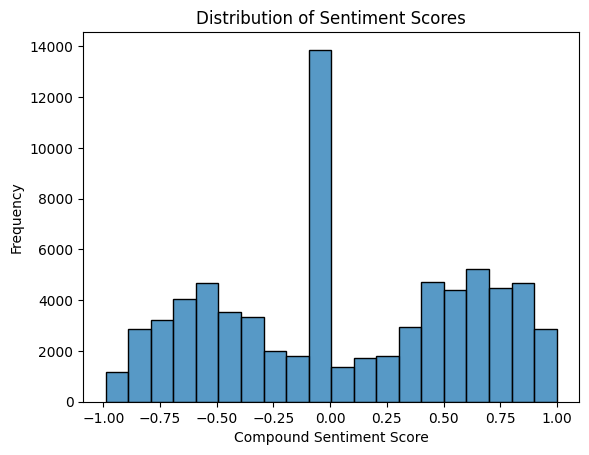

In [48]:
sns.histplot(train['compound_score'], bins=20)
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()